# Import the manipulation libraries as well as the ML and DL library

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
#for data manipulation and visualization

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
#for building the model

In [2]:
dftr = pd.read_csv('mnist_train.csv')
dfts = pd.read_csv('mnist_test.csv')
dftr.head(1)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# The data is flattened and each row represents an image

10


3

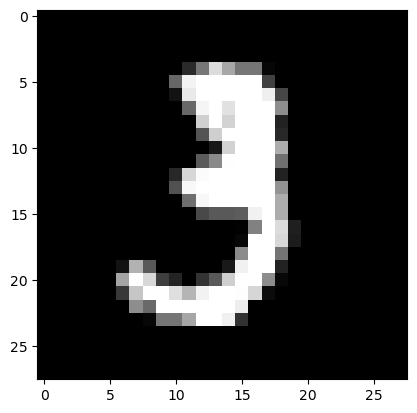

In [3]:
input1 = int(input()) #just to choose which photo you want to plot
x=dftr.iloc[input1,:]
img1=x.to_numpy()[1:].reshape(28,28)
label1 = x.iloc[0]
plt.imshow(img1,cmap='gray') #just to show the image 
label1

In [4]:
# Extract features and labels
x_train = dftr.iloc[:, 1:]  # Extracting features from columns 1 to 784
y_train = dftr.iloc[:, 0]    # Extracting labels from the first column
x_test = dfts.iloc[:, 1:]
y_test = dfts.iloc[:, 0]

In [5]:
#Normalizing the data by dividing by 255 as the pixel value ranges from 0 to 255 
# 255 is just to make the normalization value between 0 and 1 which is a good approach to normalization
x_train = x_train / 255.0
x_test = x_test / 255.0


In [6]:


# Create a sequential model
model = Sequential()

# Add dense layers
model.add(Dense(64, activation='relu'))  
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax')) 

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")


Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2847 - accuracy: 0.9179 - val_loss: 0.1598 - val_accuracy: 0.9518
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1272 - accuracy: 0.9621 - val_loss: 0.1168 - val_accuracy: 0.9651
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0935 - accuracy: 0.9718 - val_loss: 0.1164 - val_accuracy: 0.9655
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0718 - accuracy: 0.9779 - val_loss: 0.0943 - val_accuracy: 0.9725
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0601 - accuracy: 0.9815 - val_loss: 0.0972 - val_accuracy: 0.9727
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0517 - accuracy: 0.9839 - val_loss: 0.0919 - val_accuracy: 0.9740
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0436 - accuracy: 0.9863 - val_loss: 0.0896 - val_accuracy:

## Based on the results the conclusion of our model is that if we had to give it 10 photos consisting of a digit it would classify 9 photos out of the 10 the right classification

## Plotting the missclassified values

313/313 [==============================] - 0s 1ms/step
10


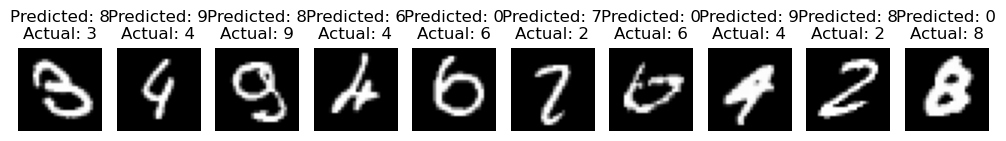

In [7]:


predictions = model.predict(x_test) # getting the probability for each label
predicted_labels = np.argmax(predictions, axis=1) # choosing the index of the highest probability 
misclassified_indices = np.where(predicted_labels != y_test)[0] 
#checking with where function to get the missclassified datapoints




num_images_to_plot = int(input())
plt.figure(figsize=(10, 10))
for i in range(num_images_to_plot):
    index = misclassified_indices[i]
    plt.subplot(1, num_images_to_plot, i + 1)
    plt.imshow(x_test.to_numpy()[index].reshape(28, 28), cmap='gray')  # Reshape to the original image size
    plt.title(f"Predicted: {predicted_labels[index]}\nActual: {y_test[index]}")
    plt.axis('off')

plt.tight_layout()
plt.show()